In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:

class memristor():
    
    def __init__(self, Von=-0.6, Voff=0.6, Ron=50, Roff=1000, L=3*10**(-9), Kon=-10, Koff=5*pow(10,-6), Aon=3, Aoff=10):
    
        self.V_on = Von
        self.V_off = Voff
        self.R_on = Ron
        self.R_off = Roff
        self.x_off = L
        self.x_on = 0
        self.x = 0
        self.K_on=Kon
        self.K_off=Koff
        self.Alpha_on=Aon
        self.Alpha_off=Aoff
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/self.x_off) * self.R_on
    
    
    def Res(self, InVolt, dt):
        
            if (InVolt >= self.V_off):
    
                dxdt = self.K_off*((InVolt/self.V_off-1)**self.Alpha_off)
    
            if (InVolt <= self.V_on):
    
                dxdt = self.K_on*((InVolt/self.V_on-1)**self.Alpha_on)
    
            if ((self.V_on < InVolt) and (InVolt < self.V_off)):
  
                dxdt=0
  
    
            if (InVolt >= 0):
           
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.x - self.Alpha_off)/10))
              #  self.x = self.x + dt* dxdt
        
        
            if (InVolt < 0):
       
                self.x = self.x + dt*dxdt*np.exp(-np.exp((self.Alpha_on - self.x)/10));
               # self.x = self.x + dt* dxdt
            
            if (self.x>=self.x_off):

                dxdt=0
                self.x = self.x_off
    
            if (self.x<=0):
    
                dxdt = 0
                self.x = 0
    
            #return self.R_on + (self.x - self.x_on)*(self.R_off - self.R_on)/(self.x_off - self.x_on)
            self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/self.x_off) * self.R_on
    
    def update(self, R: float):
    
        self.R = R

    def reset(self):  
         
        self.x = 0
        self.R = np.exp(np.log(self.R_off/self.R_on) * (self.x - self.x_on)/self.x_off) * self.R_on
    

In [18]:
dt = 1 

memr = memristor()

impulse_length = 200  #длительность импулсьа
impulse_amplitude_1 = 2
impulse_amplitude_2 = 1
impulse_value = 2*impulse_amplitude_1/((impulse_length/dt)-2) #производная в точках, не находящихся в середине импульса



In [24]:
def impulse_curve_2(t, dt): #производная импульса
    
        impulse_bias =  impulse_amplitude_1 *(t == (impulse_length/2 + dt)) + impulse_amplitude_1 *(t == (impulse_length/2))
        
        impulse = (-impulse_value) * (t > 0) + impulse_bias
        
        impulse *= -1
        
        return impulse
    

In [25]:

def impulse_curve_2_integrated(k, dt): # сам импульс, принимает не время, а номер шага по времени и dt, это чтобы при операциях с float меньше терять
    #информацию
    
    current = 0
    
    for i in range (k + 1):
    
        current +=  dt * impulse_curve_2(i*dt, dt)
        
        #print(i*dt,'\n')
        
    return current
    

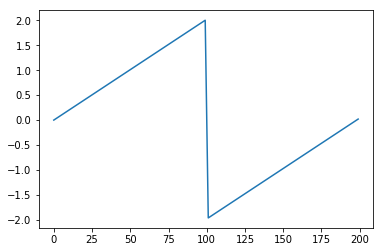

In [26]:
#строим импульс
ar = []

for i in range(int(impulse_length/dt)):
    #if i:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt + ar[i-1])
    #else:
    #    ar.append(impulse_curve_2(i * dt, dt) * dt)
    
    ar.append(impulse_curve_2_integrated(i , dt))
    #print(i*dt,'\n')
    
      
#print(ar)    
plt.figure()
plt.plot(np.arange(int(impulse_length/dt)), ar)
plt.show()

In [27]:
import torch

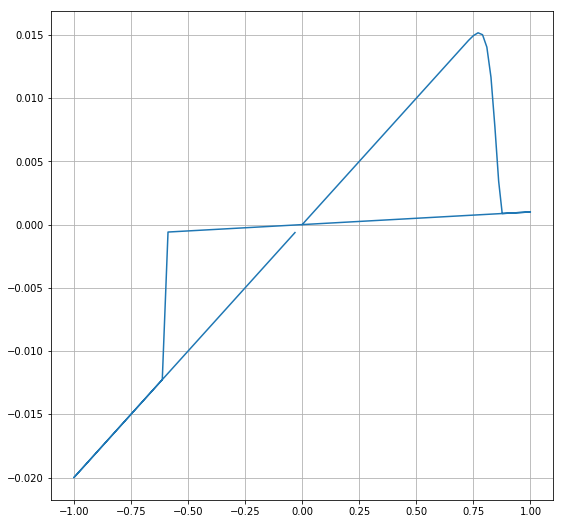

In [28]:
   #ВАХ при синусоиде
    
    pi = 3.1415/impulse_length
    
    Volt_arch = []
    I_arch = []

    for count in range( 0 , int(impulse_length/dt)):
    
            t = count * dt
            
            V = np.sin(t*2*pi)
            
            Volt_arch.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch.append(V/memr.R)
            
            fig = plt.figure(figsize=(9, 9))
            plt.plot(Volt_arch, I_arch)
            plt.grid()
              
            display.clear_output(wait=True)
            display.display(fig, display_id = 'vamp')
    
            plt.close(fig)   
                             
    memr.reset()                        

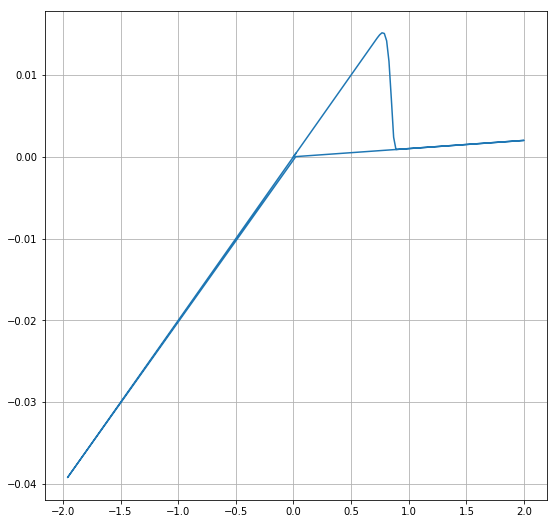

In [29]:
   #ВАХ при битреугольнике 
    Volt_arch_2 = []
    I_arch_2 = []

    for count in range( 0 , int(impulse_length/dt)):
    
            t = count * dt
            
            V = impulse_curve_2_integrated(count , dt)
            
            Volt_arch_2.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch_2.append(V/memr.R)
            
            fig_2 = plt.figure(figsize=(9, 9))
            plt.plot(Volt_arch_2, I_arch_2)
            plt.grid()
              
            display.clear_output(wait=True)
            display.display(fig_2, display_id = 'vamp2')
    
            plt.close(fig_2)   
                             
    memr.reset() 

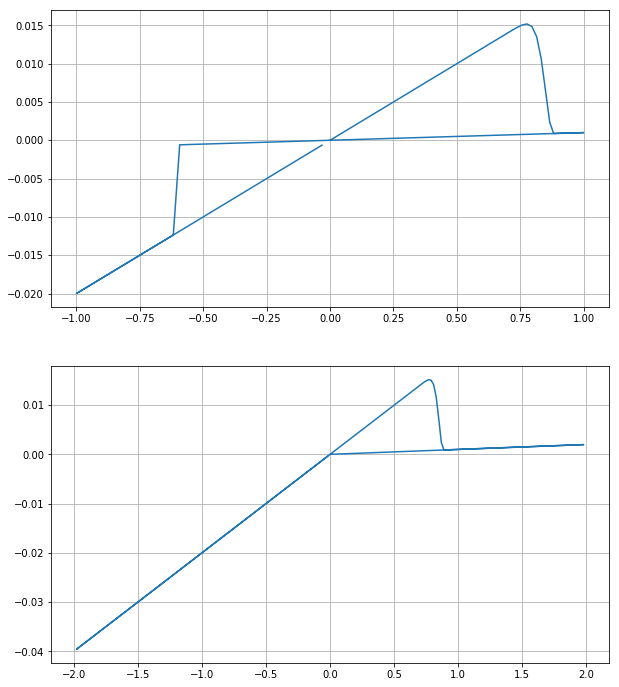

198


In [32]:

#ВАХ при различной длительности

for j in range(1 , 100):
    
    impulse_length = j * 2
    
    pi = 3.1415/impulse_length
    
    Volt_arch = []
    I_arch = []
    Volt_arch_1 = []
    I_arch_1 = []

    for count in range( 0 , int(impulse_length/dt)):
    
            t = count * dt
            
            V = np.sin(t*2*pi)
            
            Volt_arch.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch.append(V/memr.R)
            
    
    memr.reset()
    
    
    for count in range( 0 , int(impulse_length/dt)):
    
            #t = count * dt
            
            V = impulse_curve_2_integrated(count , dt)
            
            Volt_arch_1.append(V)
            # R_arch.append(memr.R)
            
            memr.Res(V , dt)
        
            I_arch_1.append(V/memr.R)    
        
    memr.reset()
#Volt_arch.sort()       


    fig_1 = plt.figure(figsize=(10, 12))
    plt.subplot(2,1,1)
    plt.plot(Volt_arch, I_arch)
    plt.grid()
    
    plt.subplot(2,1,2)
    plt.plot(Volt_arch_1, I_arch_1)
    plt.grid()
    
    display.clear_output(wait=True)
    display.display(fig_1, display_id = 'voltamp')
    
    
    plt.close(fig_1)
    
    print(j * 2)

In [42]:
#Промеряем STDP
delta_w = []
R_arch = []


pi = 3.1415/impulse_length

for count in range(int(-100/dt), int(100/dt)):
    
    delta_t = count * dt
    
    delta_w_current = 0
    
    for t_s in range( 0 , int((impulse_length + abs(delta_t))/dt)):
        
        t = t_s * dt
        
        R_c = memr.R
        
        memr.Res(impulse_curve_2_integrated(t_s, dt)*(t<=impulse_length) + impulse_curve_2_integrated(int((t - delta_t)/dt), dt)*(t>=abs(delta_t)), dt)    
       # memr.Res(np.sin(t*2*pi)*(t<=impulse_length) + np.sin((t - delta_t)*2*pi)*(t>=abs(delta_t)), dt)
        
        delta_w_current += (1/R_c - 1/memr.R)
        
        #memr.update(R_c)
        
    delta_w.append(delta_w_current)  
    
    

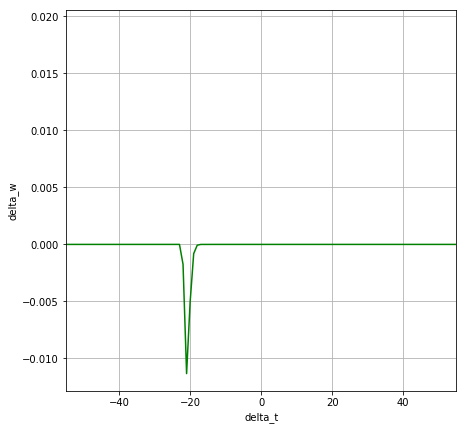

In [43]:
#Строим STDP

delta_w_STDP =delta_w
#delta_w_STDP1 =[-1.7*(0.01 + np.exp(-d/130)) for d in delta_t]
plt.figure(figsize=(7,7))
plt.plot([delta_t for delta_t in range(int(-100/dt), int(100/dt))], delta_w_STDP, color='g')
#plt.plot(delta_t, delta_w_STDP1, label='с+', color='r')
plt.ylabel('delta_w')
plt.xlabel('delta_t')
#plt.legend(loc='best')
plt.xlim(-55, 55)
plt.grid()
plt.show()